In [1]:
import pandas as pd
import numpy as np
import os
import sys
import scanpy as sc
import anndata as ad
import scipy
import gget

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dirpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/h5ad_files/"

data = {}

for f in os.listdir(dirpath):
    fullpath = f"{dirpath}{f}"
    key = f.replace(".h5ad", "")

    batch_andata = sc.read(fullpath)
    batch_andata.obs['batch'] = key
    data[key] = batch_andata
    
adata = ad.concat(data, index_unique="_") # combine all the experiments
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 43312 × 32285
    obs: 'batch'

In [3]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.calculate_qc_metrics(adata)

sc.pp.highly_variable_genes(adata, n_top_genes=10000)

adata = adata[:, adata.var.highly_variable]

""" regressing out batch effects """
sc.pp.combat(adata, key='batch')
sc.pp.scale(adata, max_value=10)

adata

... storing 'batch' as categorical


AnnData object with n_obs × n_vars = 43312 × 10000
    obs: 'batch'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

2023-09-08 12:20:17.253720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 12:20:17.395987: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-08 12:20:17.396019: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-08 12:20:17.424002: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-08 12:20:19.178640: W tensorflow/stream_executor/pla

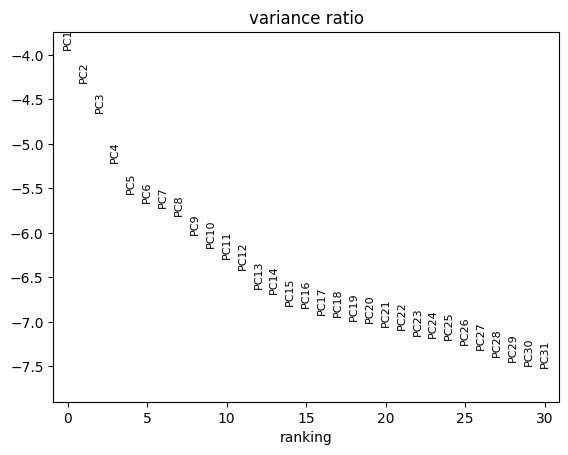

AnnData object with n_obs × n_vars = 43312 × 10000
    obs: 'batch'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [4]:
sc.tl.pca(adata, n_comps=50)
sc.pp.neighbors(adata, n_neighbors=31, n_pcs=25)

sc.pl.pca_variance_ratio(adata, log=True)

adata

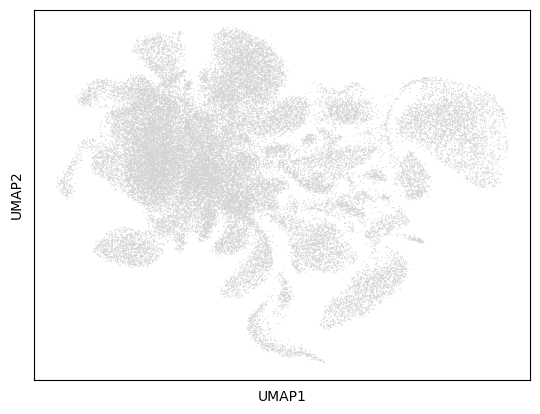

AnnData object with n_obs × n_vars = 43312 × 10000
    obs: 'batch'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
sc.tl.umap(adata, min_dist=0.95)
sc.pl.umap(adata)

adata

In [6]:
edf = pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'], index=adata.obs.index)
edf = edf.reset_index(drop=False)
outpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/results/embedding.csv"

edf.to_csv(outpath, index=False)

edf.head()

,index,UMAP1,UMAP2
0,AAACCCACATGGCTGC-1_fasted_m,-6.741960,14.083050
1,AAACCCAGTATATGGA-1_fasted_m,2.378481,2.956433
2,AAACCCAGTCAACACT-1_fasted_m,1.525248,-6.143299
3,AAACCCATCCCGTGAG-1_fasted_m,15.965842,14.408034
4,AAACCCATCGAACTCA-1_fasted_m,-2.045243,7.478702


In [7]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)